In [1]:
import pandas as pd
df = pd.read_csv("weather.csv")
df.head()

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes


In [2]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['outlook_n'] = le.fit_transform(df['outlook'])
df['temp_n'] = le.fit_transform(df['temperature'])
df['humidity_n'] = le.fit_transform(df['humidity'])
df['windy_n'] = le.fit_transform(df['windy'])
df['play_n'] = le.fit_transform(df['play'])

In [3]:
df

,outlook,temperature,humidity,windy,play,outlook_n,temp_n,humidity_n,windy_n,play_n
0,overcast,hot,high,False,yes,0,1,0,0,1
1,overcast,cool,normal,True,yes,0,0,1,1,1
2,overcast,mild,high,True,yes,0,2,0,1,1
3,overcast,hot,normal,False,yes,0,1,1,0,1
4,rainy,mild,high,False,yes,1,2,0,0,1
5,rainy,cool,normal,False,yes,1,0,1,0,1
6,rainy,cool,normal,True,no,1,0,1,1,0
7,rainy,mild,normal,False,yes,1,2,1,0,1
8,rainy,mild,high,True,no,1,2,0,1,0
9,sunny,hot,high,False,no,2,1,0,0,0


In [4]:
df=df.drop(['outlook','temperature','humidity','windy','play'],axis=1)
df

,outlook_n,temp_n,humidity_n,windy_n,play_n
0,0,1,0,0,1
1,0,0,1,1,1
2,0,2,0,1,1
3,0,1,1,0,1
4,1,2,0,0,1
5,1,0,1,0,1
6,1,0,1,1,0
7,1,2,1,0,1
8,1,2,0,1,0
9,2,1,0,0,0


In [5]:
x=df.iloc[:,:4]
x

,outlook_n,temp_n,humidity_n,windy_n
0,0,1,0,0
1,0,0,1,1
2,0,2,0,1
3,0,1,1,0
4,1,2,0,0
5,1,0,1,0
6,1,0,1,1
7,1,2,1,0
8,1,2,0,1
9,2,1,0,0


In [6]:
y=df.iloc[:,4]
y

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: play_n, dtype: int32

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(len(x_train))
print(len(x_test))

9
5


In [8]:
print(y_test)

9     0
11    0
0     1
12    1
5     1
Name: play_n, dtype: int32


In [9]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [19]:
gnb.fit(x_train,y_train)

GaussianNB()

In [21]:
y_pred=gnb.predict(x_test)

In [23]:
y_pred

array([1, 1, 1, 1, 1])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("the accuracy is {}%".format(accuracy*100))
print(cm)
print(cr)


the accuracy is 60.0%
[[0 2]
 [0 3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



C:\Users\M-Sasmal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M-Sasmal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M-Sasmal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(50.722222222222214, 0.5, 'Truth')

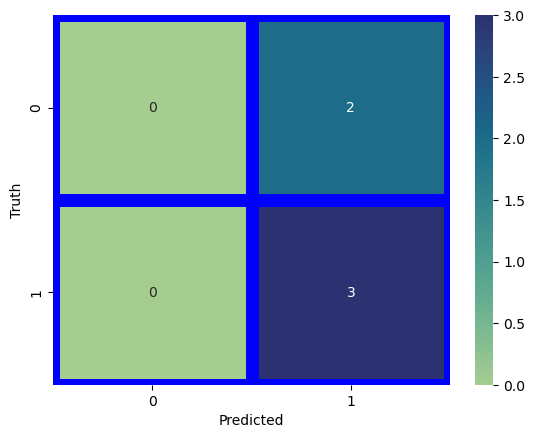

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True,cmap='crest',linecolor='blue',linewidths=8)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
gnb.score(x_test,y_test)

0.6

In [29]:
gnb.predict([[2,2,1,0]])

C:\Users\M-Sasmal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [33]:
gnb.predict([[2,1,0,1]])

C:\Users\M-Sasmal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])